## Evaluating Model Convergence with Loglikelihood

### What is Loglikelihood?
The loglikelihood is a mathematical measure of how well our topic model fits the observed data. In simple terms, it tells us how probable our data is given the current model parameters.

### Why Monitor Loglikelihood?
Monitoring the loglikelihood during training helps us:
1. **Check for convergence**: When the loglikelihood stabilizes (flattens out), it suggests the model has converged to a solution
2. **Avoid underfitting**: If the curve is still climbing steeply, we might need more iterations to reach optimal performance
3. **Diagnose training issues**: Sudden drops or erratic behavior can indicate problems with the model or data

### Interpreting the Plot
- **Upward trend that plateaus**: Ideal scenario indicating proper convergence
- **Continuously increasing**: Model needs more iterations to converge
- **Flat from the beginning**: May indicate issues with preprocessing or model initialization
- **Decreasing**: Potential problems with learning rate or other hyperparameters

The plot below shows how our model's loglikelihood changes across iterations. If the curve hasn't flattened by the end, consider increasing `n_iters` in your configuration.

PS: to run the code below, you would need to run first the notebook : `02_model_training.ipynb` that creates a model in the `models` folder or to create multiple models by using the python command: `python src/topic_modeller.py -c configs/model_configs.jsonl`

In [2]:
import pickle

# Upload the topic model
# Load the topic model from a file
with open('models/model_0.pkl', 'rb') as file:
    topic_model = pickle.load(file)

# Provide an explanation
print("The topic model has been successfully loaded. This model will be used to evaluate the loglikelihood and monitor convergence.")

The topic model has been successfully loaded. This model will be used to evaluate the loglikelihood and monitor convergence.


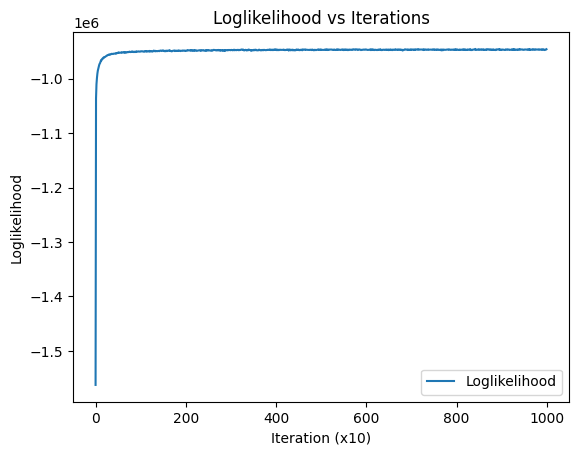

In [3]:
import matplotlib.pyplot as plt

# Plot likelihoods to check if the distribution is stable.
# If it looks like it is still improving, increase the number of iterations.
plt.plot(topic_model.loglikelihoods_, label='Loglikelihood')
plt.ylabel('Loglikelihood')
plt.xlabel('Iteration (x10)')
plt.title('Loglikelihood vs Iterations')
plt.legend()
plt.show()

## Zooming In: A Closer Look at Model Convergence

### Why Look Closer?
While the full loglikelihood plot gives us a high-level view of convergence, subtle patterns in the later iterations can reveal important insights that might be visually masked in the full-scale plot.

### What We're Looking For
When we zoom in to examine iterations :

1. **Micro-improvements**: Small but consistent upward trends indicate the model is still learning
2. **Oscillation patterns**: Regular up-and-down patterns might suggest the model is "hunting" around the optimal solution
3. **True plateaus**: A genuinely flat line suggests complete convergence
4. **Slight downtrends**: Could indicate potential overfitting beginning to occur


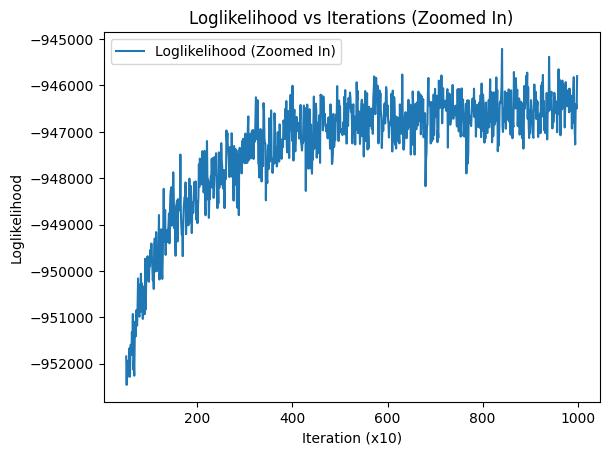

In [4]:

# Zoom in on the loglikelihood plot to examine later iterations.
# If it looks like it is still improving, increase the number of iterations.
iteration = 50
plt.plot(range(iteration, iteration + len(topic_model.loglikelihoods_[iteration:])), topic_model.loglikelihoods_[iteration:], label='Loglikelihood (Zoomed In)')
plt.ylabel('Loglikelihood')
plt.xlabel('Iteration (x10)')
plt.title('Loglikelihood vs Iterations (Zoomed In)')
plt.legend()
plt.show()


### Making Model Decisions
Based on what you observe in this zoomed view:
- **Still trending up?** Increase `n_iters` to allow full convergence
- **Completely flat?** Your current iteration count is sufficient
- **Unstable oscillations?** Consider adjusting learning parameters
- **Trending slightly down?** You might be at risk of overfitting

This detailed inspection helps ensure you're not stopping training too early or continuing unnecessarily long, ultimately leading to more accurate topic representations.